# Assignment 1
## Create a Fully Connected Minimal Neural Network for MNIST Dataset

### Install necessary libraries
#### If the libraries are not installed, please uncomment the code cell below and run

In [1]:
# ! pip install numpy 
import sklearn
sklearn.__version__

'1.1.0'

### Import the necessary libraries

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

### Fetch the MNIST dataset

In [8]:
# WONT WORK WITH OLDER VERSIONS OF SCIKIT-LEARN
#from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata('MNIST original')
#X, y = mnist["data"], mnist["target"]

In [19]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [22]:
X.shape, y.shape

((70000, 784), (70000,))

### Normalization of data

In [23]:
X = X/255
X = X.to_numpy()

### Preparing the dataset

In [24]:
digits = 10
examples = y.shape[0]

y = y.to_numpy()
y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [25]:
X.shape, y.shape, Y_new.shape

((70000, 784), (1, 70000), (10, 70000))

In [26]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)


In [27]:
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

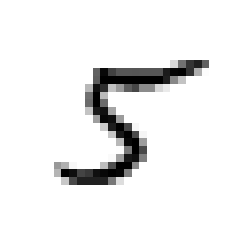

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [28]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

### Loss function

In [29]:
#activation sigmoid
def sigmoid(x):
    return 1. / (1.+np.exp(-x))

def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

### Try the efficient loss function as well

In [ ]:
def compute_multiclass_loss_efficient(Y, Y_hat):

    L_sum = None
    m = None
    L = None

    return L

### Train the model

In [30]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  9.712659561210312
Epoch 100 cost:  0.7450695406339258
Epoch 200 cost:  0.5658359662193594
Epoch 300 cost:  0.48857882321223667
Epoch 400 cost:  0.44171276013984145
Epoch 500 cost:  0.40888857865102946
Epoch 600 cost:  0.3839695211695479
Epoch 700 cost:  0.36401772736574356
Epoch 800 cost:  0.3474522587588055
Epoch 900 cost:  0.33333486474264423
Epoch 1000 cost:  0.3210694670098014
Epoch 1100 cost:  0.31026161799160373
Epoch 1200 cost:  0.30063442694414183
Epoch 1300 cost:  0.29197792702768427
Epoch 1400 cost:  0.28412720824843096
Epoch 1500 cost:  0.27695430164879065
Epoch 1600 cost:  0.27035701243474924
Epoch 1700 cost:  0.264250515347034
Epoch 1800 cost:  0.25856532090052065
Epoch 1900 cost:  0.25324551268886875
Final cost: 0.2482948430497055


### Predictions

In [31]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))

[[ 951    0    9    2    3   11   10    2    8    9]
 [   0 1111    1    1    1    2    3    7    6    8]
 [   3    1  946   17   10    6   12   21   15    1]
 [   4    5   12  922    0   27    3    7   19   11]
 [   0    1   12    2  895    4   13    6   10   49]
 [   5    1    1   23    1  804   16    4   22    8]
 [   8    5   12    0   11   15  895    0    7    2]
 [   4    1   13   15    3    4    1  943    9   21]
 [   5    9   20   21    8   11    5    6  872   10]
 [   0    1    6    7   50    8    0   32    6  890]]


In [32]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1005
           1       0.98      0.97      0.98      1140
           2       0.92      0.92      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.91      0.90      0.91       992
           5       0.90      0.91      0.90       885
           6       0.93      0.94      0.94       955
           7       0.92      0.93      0.92      1014
           8       0.90      0.90      0.90       967
           9       0.88      0.89      0.89      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## 92% Accuracy